# Group Proposal.


## Title: The Future of the Heart
### Introduction:

Many say the heart is the main part of our body, and that is generally true! Our heart performs the difficult task of pumping blood to the whole body and consequently making sure the body has all it needs to function properly. Sadly, the heart is also not perfect and can be negatively impacted in a bunch of different ways, causing heart diseases. Some of them are diabetes, hypertension, high cholesterol and many others.
So, the aim of this project is based on different types of clinical measurements (heart-related), to predict if someone has a heart disease. To do that, our group is going to be using classification and the KNN algorithm to answer: “Based on heart-related clinical measurements, does this person have heart disease?”.
For this, we are going to be using a Heart Disease data set, collected by the University of California Irvine, which contains data regarding blood pressure, cholesterol levels, sugar levels in the blood and many more. All this data was collected from 4 different regions around the world, being them: Cleveland (USA), Hungary, Switzerland, and California (USA).


### Preliminary Data Analysis:
In the code below, we read all the data here into R, merged the four different data tables into one, and removed all the NA values - in this case being `?`.

For the visualization we chose a bar graph, contrasting `age` with `narrowing`, where `narrowing` indicates that if the number is equal to or bigger than one, the person has a blood vessel narrowing bigger than 50%, and therefore is a good indicator of heart disease. 
### Methods:

We are most likely going to be using the `narrowing` (previously `num`) column as one of our main predictors, but also we might use `chol` which indicates cholesterol levels, `trestbps` which indicates resting blood pressure and lastly `fbs` which represents fasting blood sugar levels; all of those for predicting if one has a heart disease or not. We are also going to use `sex` and `age` to see if we can find any particular trend among these variables related to the measurement previously cited.
We will visualize the results by inputting a new observations data set, and see if our workflow correctly predicts if the person has a heart disease or not.

### Expected outcomes and significance:

We expect to create an effective classification algorithm, in a way that based on simple blood measurements, can predict if someone has a heart disease. If we manage to accomplish this, this algorithm could have a great impact in the health industry, helping doctors, nurses and professionals from this area to have accurate diagnoses more quickly, and therefore decreasing waiting times for exam results interpretations. And in the future, this could lead to more algorithms following this same idea, but for more areas within the health industry, for example, gastrointestinal diseases.




In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# we import the databases from the UCI Irvine data base. There are four regions from which the data is sampled.

# also rename the columns of the dataframes to their respective titles. So thatit is human-readable.
cleveland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"))
colnames(cleveland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
hungarian_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"))
colnames(hungarian_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
switzerland_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"))
colnames(switzerland_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
va_data <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"))
colnames(va_data)<-
             c("age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data
hungarian_data
switzerland_data
va_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `2` -> `2...3`
• `0` -> `0...6`
• `2` -> `2...7`
• `0` -> `0...9`
• `0` -> `0...10`
• `?` -> `?...11`
• `?` -> `?...12`
• `?` -> `?...13`
• `0` -> `0...14`
Rows: 293 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): 130, 132, 0...6, 2...7, 185, 0...9, ?...11, ?...12, ?...13
dbl (5): 28, 1, 2...3, 0...10, 0...14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
36,1,4,110,0,?,0,125,1,1,2,?,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
44,1,4,130,209,0,1,127,0,0,?,?,?,0
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2
58,1,4,?,385,1,2,?,?,?,?,?,?,0
62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [3]:
# We include the names of the respective regions so we can identify each region when combined together.
cleveland_data <- mutate(cleveland_data, region = "Cleveland")
hungarian_data <- mutate(hungarian_data, region = "Hungary")
switzerland_data <- mutate(switzerland_data, region = "Switzerland")
va_data <- mutate(va_data, region = "VA Long Beach")
cleveland_data
hungarian_data
switzerland_data
va_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0,Cleveland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
29,1,2,120,243,0,0,160,0,0,?,?,?,0,Hungary
29,1,2,140,?,0,0,170,0,0,?,?,?,0,Hungary
30,0,1,170,237,0,1,170,0,0,?,?,6,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,?,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,?,?,1,Hungary


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
34,1,4,115,0,?,?,154,0,.2,1,?,?,1,Switzerland
35,1,4,?,0,?,0,130,1,?,?,?,7,3,Switzerland
36,1,4,110,0,?,0,125,1,1,2,?,6,1,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0,Switzerland
73,0,3,160,0,0,1,121,0,0,1,?,3,1,Switzerland
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1,Switzerland


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
44,1,4,130,209,0,1,127,0,0,?,?,?,0,VA Long Beach
60,1,4,132,218,0,1,140,1,1.5,3,?,?,2,VA Long Beach
55,1,4,142,228,0,1,149,1,2.5,1,?,?,1,VA Long Beach
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


In [4]:
# combine all four dataframes from the four regions into one single dataframe
final_df <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
final_df


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,?,?,6,2,VA Long Beach
58,1,4,?,385,1,2,?,?,?,?,?,?,0,VA Long Beach
62,1,2,120,254,0,2,93,1,0,?,?,?,1,VA Long Beach


In [5]:
# we remove all the empty cells from the dataframe.
final_df1 <- filter(final_df, trestbps != "?" & chol != "?" & fbs != "?" & restecg != "?" & thalach != "?" & exang != "?" & oldpeak != "?" & slope != "?" & ca != "?" & thal != "?")
final_df1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,region
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,1,Cleveland
47,1,4,150,226,0,0,98,1,1.5,2,0,7,1,Hungary
56,1,4,120,100,0,0,120,1,1.5,2,0,7,1,VA Long Beach


In [71]:
# re classify the variables in the dataframe to allow for wrangling and classification.
final_df2 <- final_df1 |>
             mutate(narrowing = case_when(num < 1 ~ "< 50% diameter narrowing", num >= 1 ~ "> 50% diameter narrowing")) |>
             mutate(narrowing = as_factor(narrowing), cp = as.numeric(cp), trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), thalach = as.numeric(thalach)) |> 
             select(-num)
final_df2
# sex remains as a number rather than factor since we need it for classification.

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,region,narrowing
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Cleveland,> 50% diameter narrowing
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Cleveland,> 50% diameter narrowing
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Cleveland,< 50% diameter narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,2,130,236,0,2,174,0,0,2,1.0,3.0,Cleveland,> 50% diameter narrowing
47,1,4,150,226,0,0,98,1,1.5,2,0,7,Hungary,> 50% diameter narrowing
56,1,4,120,100,0,0,120,1,1.5,2,0,7,VA Long Beach,> 50% diameter narrowing


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


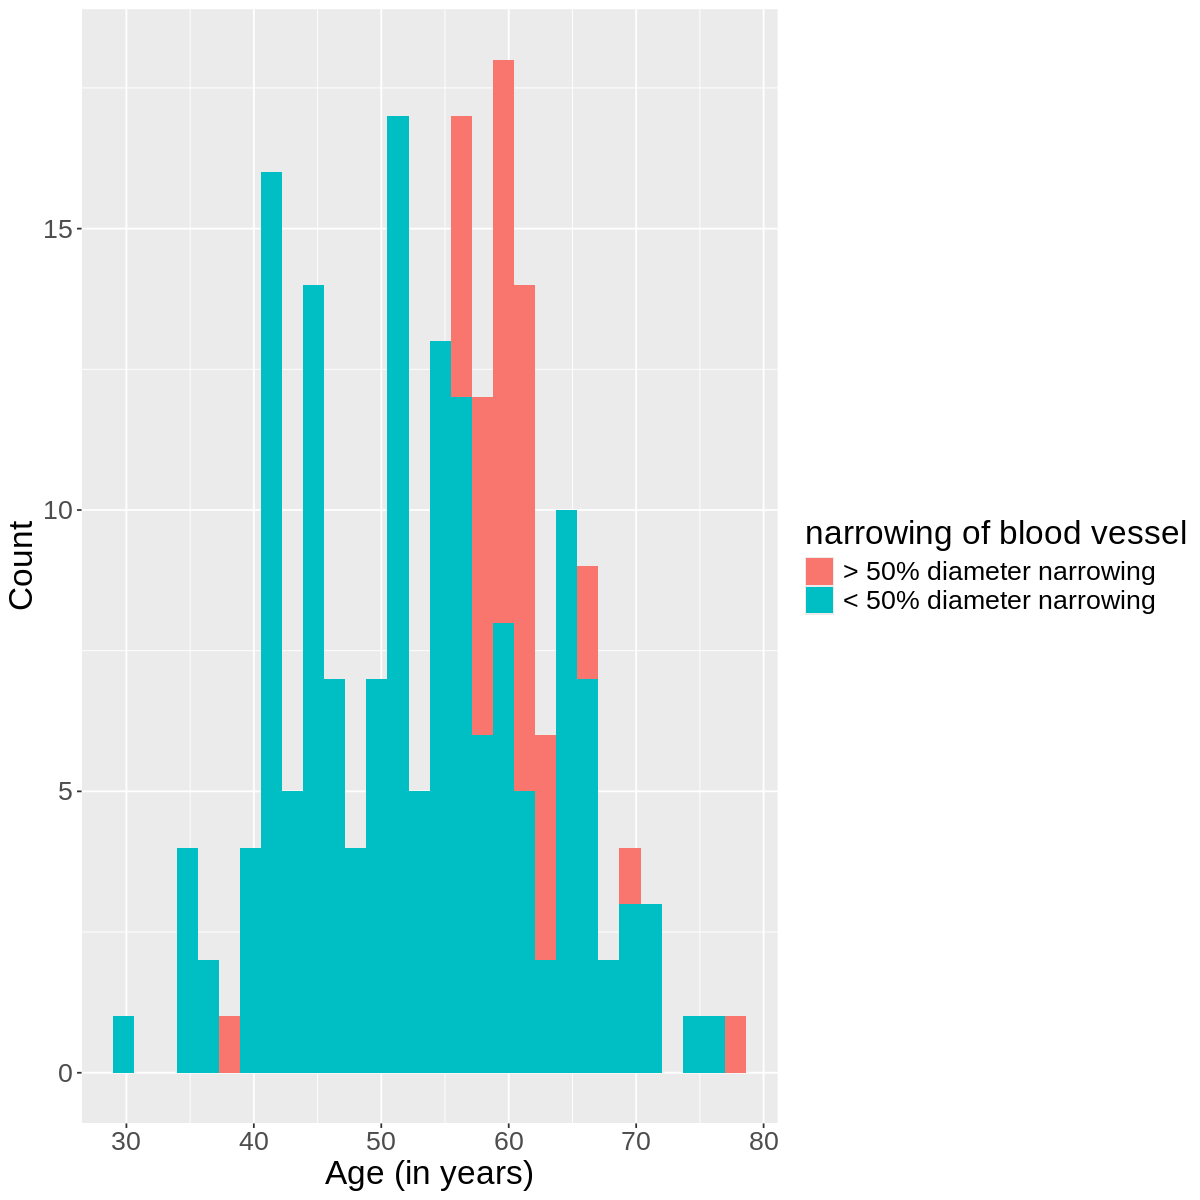

In [68]:
# create a plot of age against narrowing 
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggplot(final_df2, aes(x = age, fill = narrowing)) +
        geom_histogram(position = "identity") +
        labs(x = "Age (in years)", y = "Count", fill = "narrowing of blood vessel") +
        theme(text = element_text(size = 20))

plot

In [69]:
# WE are going to split the data into training and testing
set.seed(0001)

split_data <- initial_split(final_df2, prop = 0.75, strata = narrowing)
training_data <- training(split_data)
testing_data <- testing(split_data)

# Finding the optimum K neighbor

k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
          set_engine("kknn") |>
          set_mode("classification")

recipe <- recipe(narrowing ~ trestbps + chol + fbs + age + sex, data = training_data) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

# create a vfold to apply cross validation
training_vfold <- vfold_cv(training_data, v = 5, strata = narrowing)

gridval <- tibble(neighbors = seq(from = 1, to = 178, by = 1))



→ A | warning: 178 samples were requested but there were 178 rows in the data. 173 will be used.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3

There were issues with some computations   A: x4

→ B | warning: 178 samples were requested but there were 180 rows in the data. 175 will be used.

There were issues with some computations   A: x4
There were issues with some computations   A: x4   B: x1

There were issues with some computations   A: x4   B: x1





[1] 39

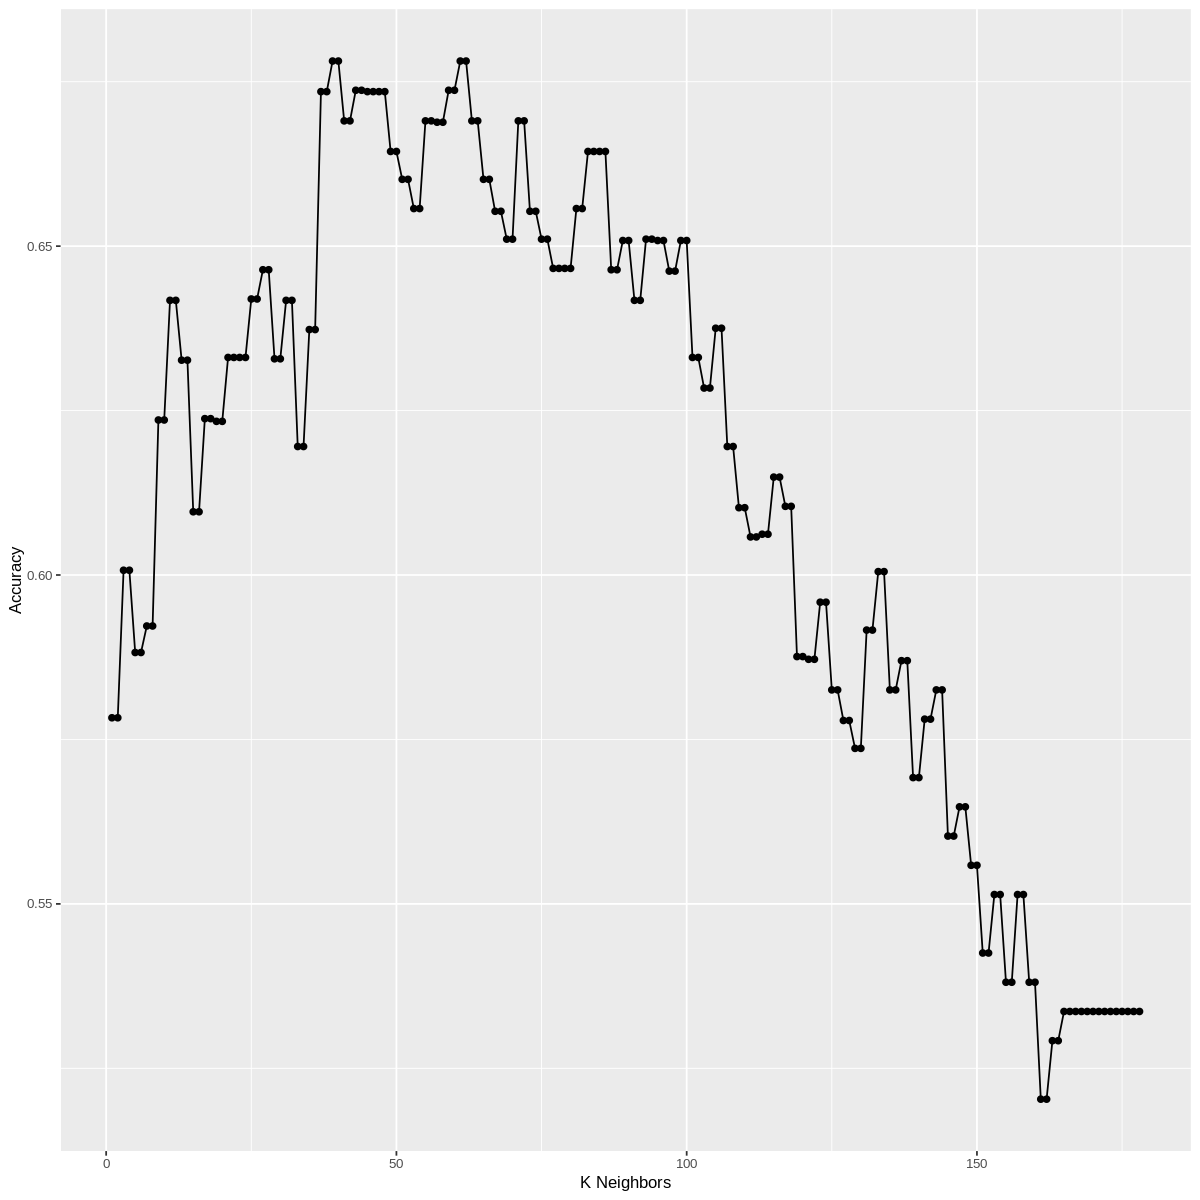

In [70]:
# create a workflow and extract the metrics from it's classification to figure out the optimum K
knn_results <- workflow() |>
         add_recipe(recipe) |>
         add_model(k_spec) |>
         tune_grid(resamples = training_vfold, grid = gridval) |>
         collect_metrics() |>
         filter(.metric == "accuracy")
# single out the best K neighbors
best_k <- knn_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

best_k

# create a plot to visualize k-neighbors versus it's respective accuracy.
knn_results_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
              geom_point() +
              geom_line() +
              labs(x = "K Neighbors", y = "Accuracy") +
              theme(text = element_text(size = 10))
knn_results_plot

In [72]:
# we found the optimum k and we will re-train the data and then use it on the test data.

k_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 39) |>
           set_engine("kknn") |>
           set_mode("classification")

k_fit <- workflow() |>
          add_recipe(recipe) |>
          add_model(k_spec2) |>
          fit(data = training_data)

# predict on the test data.
k_prediction <- predict(k_fit, testing_data) |>
             bind_cols(testing_data) 

# extract the results from our classification attempt.
k_results <- metrics(k_prediction, truth = narrowing, estimate = .pred_class) |>
            filter(.metric == "accuracy")

k_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.68


In [73]:
summary_data <- select(final_df2, trestbps,	chol, fbs) |>
         summary()
summary_data


    trestbps          chol            fbs        
 Min.   : 94.0   Min.   :100.0   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000  
 Median :130.0   Median :242.5   Median :0.0000  
 Mean   :131.7   Mean   :246.8   Mean   :0.1409  
 3rd Qu.:140.0   3rd Qu.:275.8   3rd Qu.:0.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000  

In [74]:
# counting the number of N/A
# Replace "?" with NA in the entire data frame
final_df[final_df == "?"] <- NA

# Count missing values using colSums() and is.na()
na_count <- sum(is.na(final_df))

na_count

[1] 1751

In [21]:
# missing values per column
na_count <- colSums(is.na(final_df))
na_count

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0       59       30       89        2       55 
   exang  oldpeak    slope       ca     thal      num   region 
      55       62      308      608      483        0        0

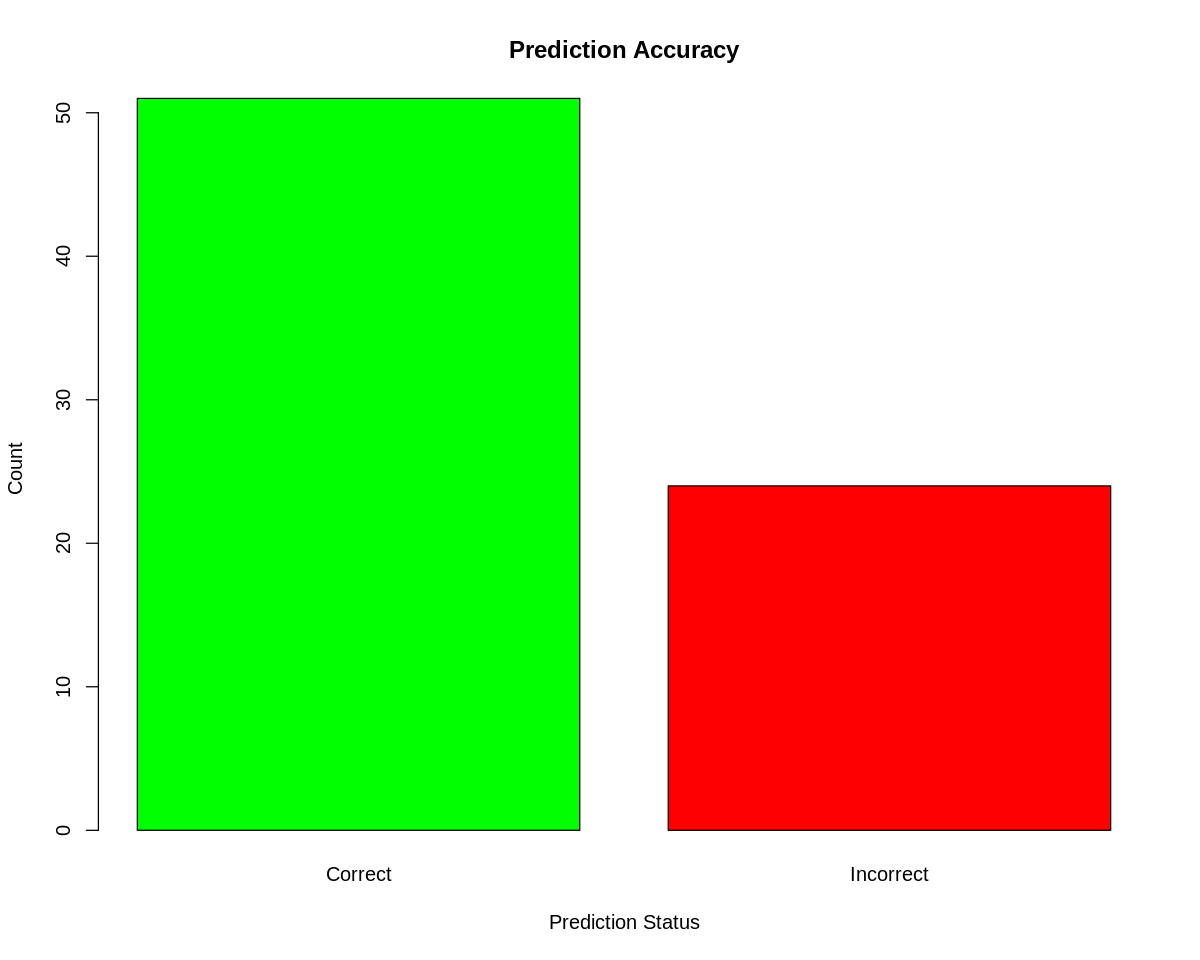

In [75]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Assuming your data frame is named "mydata" and the original variable is named "original_variable"
# and the predicted variable is named "predicted_variable"

# Create a new column in the data frame indicating whether the prediction was correct or incorrect
k_prediction$prediction_status <- ifelse(k_prediction$narrowing == k_prediction$.pred_class, "Correct", "Incorrect")

# Compute the count of correct and incorrect predictions
prediction_counts <- table(k_prediction$prediction_status)

# Plot a bar chart
barplot(prediction_counts, main = "Prediction Accuracy", xlab = "Prediction Status", ylab = "Count", col = c("green", "red"))


In [76]:
# we plot the confusion matrix
confusion <- k_prediction |>
             conf_mat(truth = narrowing, estimate = .pred_class)
confusion

                          Truth
Prediction                 > 50% diameter narrowing < 50% diameter narrowing
  > 50% diameter narrowing                       22                       11
  < 50% diameter narrowing                       13                       29

In [81]:
# create a dataframe from the confusion to allow for a plotting of the confusion matrix
conf_matrix_df <- as.data.frame(confusion$table)
conf_matrix_df

Prediction,Truth,Freq
<fct>,<fct>,<dbl>
> 50% diameter narrowing,> 50% diameter narrowing,22
< 50% diameter narrowing,> 50% diameter narrowing,13
> 50% diameter narrowing,< 50% diameter narrowing,11
< 50% diameter narrowing,< 50% diameter narrowing,29


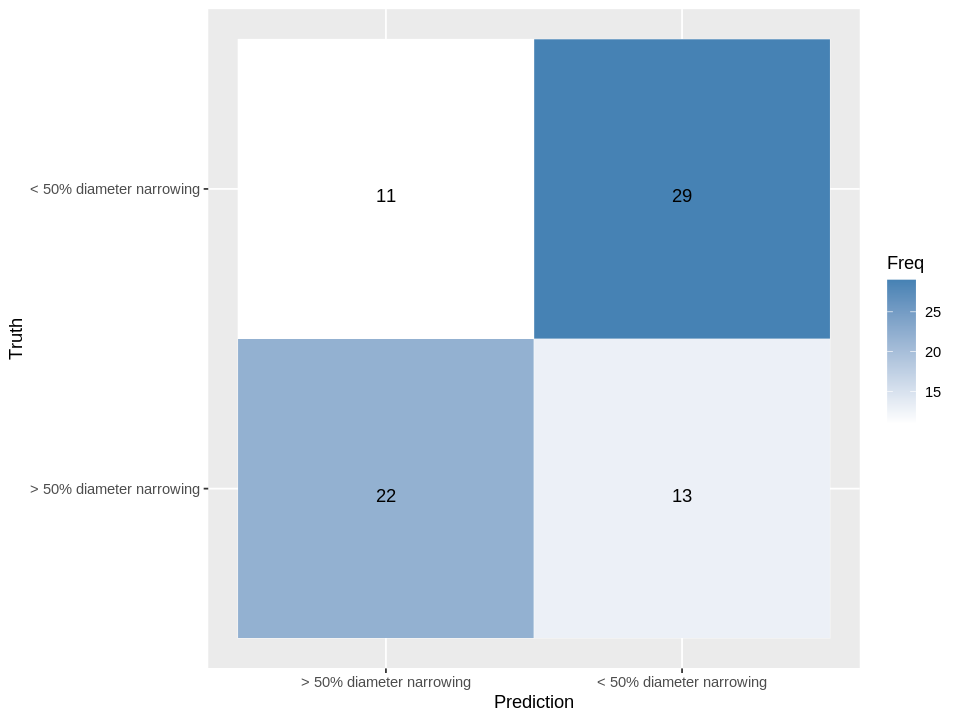

In [86]:
# creating a visualization of the confusion matrix 
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data =  conf_matrix_df, mapping = aes(x = Prediction, y = Truth)) +
  geom_tile(aes(fill = Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f",Freq)), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue")